# Introduction

In the fiercely competitive telecommunications industry, customer retention holds equal significance to customer acquisition. SyriaTel, currently grappling with escalating customer churn, aims to employ data-driven insights to comprehensively grasp and alleviate the factors contributing to customer attrition. This analysis navigates the intricacies of customer behavior, service utilization, and interaction patterns to unveil the underlying causes of churn. The goal is to pinpoint vulnerable customers and the elements influencing their departure, proposing precise strategies to boost satisfaction, nurture loyalty, and ultimately curtail churn. SyriaTel envisions that this initiative will fortify its market standing, redefining its customer relationship management approach and setting a new benchmark for telecommunications service excellence.

# Problem Statement

SyriaTel faces a critical challenge in retaining its customer base, with an upward trend in customer churn. This churn not only impacts the company's revenue but also escalates the expenses associated with acquiring new customers to maintain market share. The identification of factors contributing to churn and the prediction of at-risk customers empower SyriaTel to implement focused retention strategies, fostering customer loyalty and mitigating turnover.

This analysis scrutinizes the patterns and predictors of customer churn at SyriaTel, a prominent telecommunications provider. Leveraging customer usage data, service plans, and interaction history, we employ statistical analysis and machine learning models to discern primary drivers of churn. The study aims to segment the customer base, assess the impact of diverse service features on customer retention, and construct a predictive model to pinpoint at-risk customers. The analysis outcomes guide targeted interventions geared towards enhancing customer satisfaction and loyalty, reducing churn rates, and nurturing sustained business growth.







# Objectives

1. Identifying Churn Factors: Understand the factors contributing to customer churn by analyzing data on customer behavior, service usage, and interaction patterns.
2. Predictive Modeling: Develop machine learning models to predict which customers are at risk of churning. This involves using historical data to create models that can anticipate future customer behavior.
3. Improve the model using hyper parameter tuning to increase its accuracy.

# Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline
import sklearn
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

# Creating DataFrame & Data Understanding

In [2]:
file_path = r"C:\Users\thorn\Downloads\archive (16)\bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(file_path)
df.head(10)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   
6    MA             121        510     355-9993                 no   
7    MO             147        415     329-9001                yes   
8    LA             117        408     335-4719                 no   
9    WV             141        415     330-8173                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   
5              no                      0              223.4               98   
6             yes                     24              218.2               88   
7              no                      0              157.0               79   
8              no                      0              184.5               97   
9             yes                     37              258.6               84   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   
5             37.98  ...              101             18.75   
6             37.09  ...              108             29.62   
7             26.69  ...               94              8.76   
8             31.37  ...               80             29.89   
9             43.96  ...              111             18.87   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6           

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
missing_values = df.isnull().sum()

# Displaying the columns with missing values and their counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [5]:
df.duplicated().sum()

0

# Explanatory Data Analysis (EDA)

# checking for outliers and dropping them

In [6]:
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering out values outside the bounds
    filtered_data = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    
    return filtered_data


columns_to_check = [
    'account length', 'number vmail messages',
    'total day minutes', 'total day calls', 'total day charge',
    'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge',
    'customer service calls'
]

# Applying the remove_outliers function to each specified column
for column in columns_to_check:
    df = remove_outliers(df, column)


df.head(10)


state  account length  area code phone number international plan  \
0     KS             128        415     382-4657                 no   
1     OH             107        415     371-7191                 no   
2     NJ             137        415     358-1921                 no   
4     OK              75        415     330-6626                yes   
5     AL             118        510     391-8027                yes   
7     MO             147        415     329-9001                yes   
9     WV             141        415     330-8173                yes   
11    RI              74        415     344-9403                 no   
12    IA             168        408     363-1107                 no   
13    MT              95        510     394-8006                 no   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0              yes                     25              265.1              110   
1              yes                     26              161.6              123   
2               no                      0              243.4              114   
4               no                      0              166.7              113   
5               no                      0              223.4               98   
7               no                      0              157.0               79   
9              yes                     37              258.6               84   
11              no                      0              187.7              127   
12              no                      0              128.8               96   
13              no                      0              156.6               88   

    total day charge  ...  total eve calls  total eve charge  \
0              45.07  ...               99             16.78   
1              27.47  ...              103             16.62   
2              41.38  ...              110             10.30   
4              28.34  ...              122             12.61   
5              37.98  ...              101             18.75   
7              26.69  ...               94              8.76   
9              43.96  ...              111             18.87   
11             31.91  ...              148             13.89   
12             21.90  ...               71              8.92   
13             26.62  ...               75             21.05   

    total night minutes  total night calls  total night charge  \
0                 244.7                 91               11.01   
1                 254.4                103               11.45   
2                 162.6                104                7.32   
4                 186.9                121                8.41   
5                 203.9                118                9.18   
7                 211.8                 96                9.53   
9                 326.4                 97               14.69   
11                196.0                 94                8.82   
12                141.1                128                6.35   
13                192.3                115                8.65   

    total intl minutes  total intl calls  total intl charge  \
0                 10.0                 3               2.70   
1                 13.7                 3               3.70   
2                 12.2                 5               3.29   
4                 10.1                 3               2.73   
5                  6.3                 6               1.70   
7                  7.1                 6               1.92   
9                 11.2                 5               3.02   
11                 9.1                 5               2.46   
12                11.2                 2               3.02   
13                12.3                 5               3.32   

    customer service calls  churn  
0                        1  False  
1                        1  False  
2                        0  False  
4                        3  False  
5                      

# Dropping the phone number column because it will not be used.

In [7]:
df.drop(['phone number'],axis=1,inplace=True)
df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
4    OK              75        415                yes              no   
5    AL             118        510                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
4                      0              166.7              113   
5                      0              223.4               98   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
4             28.34              148.3              122             12.61   
5             37.98              220.6              101             18.75   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
4                186.9                121                8.41   
5                203.9                118                9.18   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
4                       3  False  
5                       0  False

# Checking for multicollinearity

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Selecting only numeric columns for VIF calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_columns
vif_data["VIF"] = [variance_inflation_factor(df[numeric_columns].values, i) for i in range(df[numeric_columns].shape[1])]

# Displaying the DataFrame with VIF values
print(vif_data)

                  Variable           VIF
0           account length  7.409557e+00
1                area code  6.296558e+01
2    number vmail messages  1.352428e+00
3        total day minutes  1.242659e+08
4          total day calls  2.559093e+01
5         total day charge  1.242713e+08
6        total eve minutes  3.735032e+07
7          total eve calls  2.547309e+01
8         total eve charge  3.735060e+07
9      total night minutes  1.084224e+07
10       total night calls  2.574465e+01
11      total night charge  1.084181e+07
12      total intl minutes  9.890243e+05
13        total intl calls  5.246872e+00
14       total intl charge  9.895326e+05
15  customer service calls  2.792701e+00


In [9]:
df.nunique()

state                       51
account length             198
area code                    3
international plan           2
voice mail plan              2
number vmail messages       45
total day minutes         1517
total day calls            104
total day charge          1517
total eve minutes         1466
total eve calls            106
total eve charge          1315
total night minutes       1447
total night calls          105
total night charge         873
total intl minutes         139
total intl calls            10
total intl charge          139
customer service calls       4
churn                        2
dtype: int64

In [10]:
numeric_columnss = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_columns = ['state','area code','international plan','voice mail plan']

In [11]:
print(df.churn.value_counts())

churn
False    2493
True      304
Name: count, dtype: int64


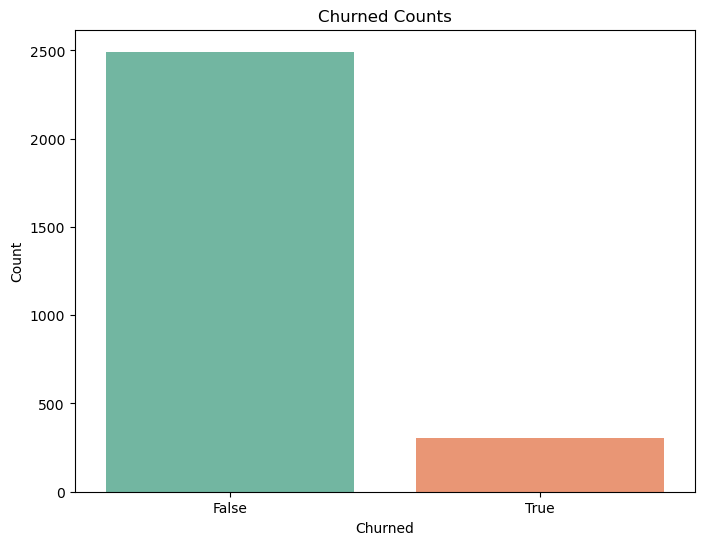

In [12]:
churn_counts = df['churn'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")
plt.title("Churned Counts")
plt.xlabel("Churned")
plt.ylabel("Count")
plt.show()

# Distrubution Plots for Numeric Features

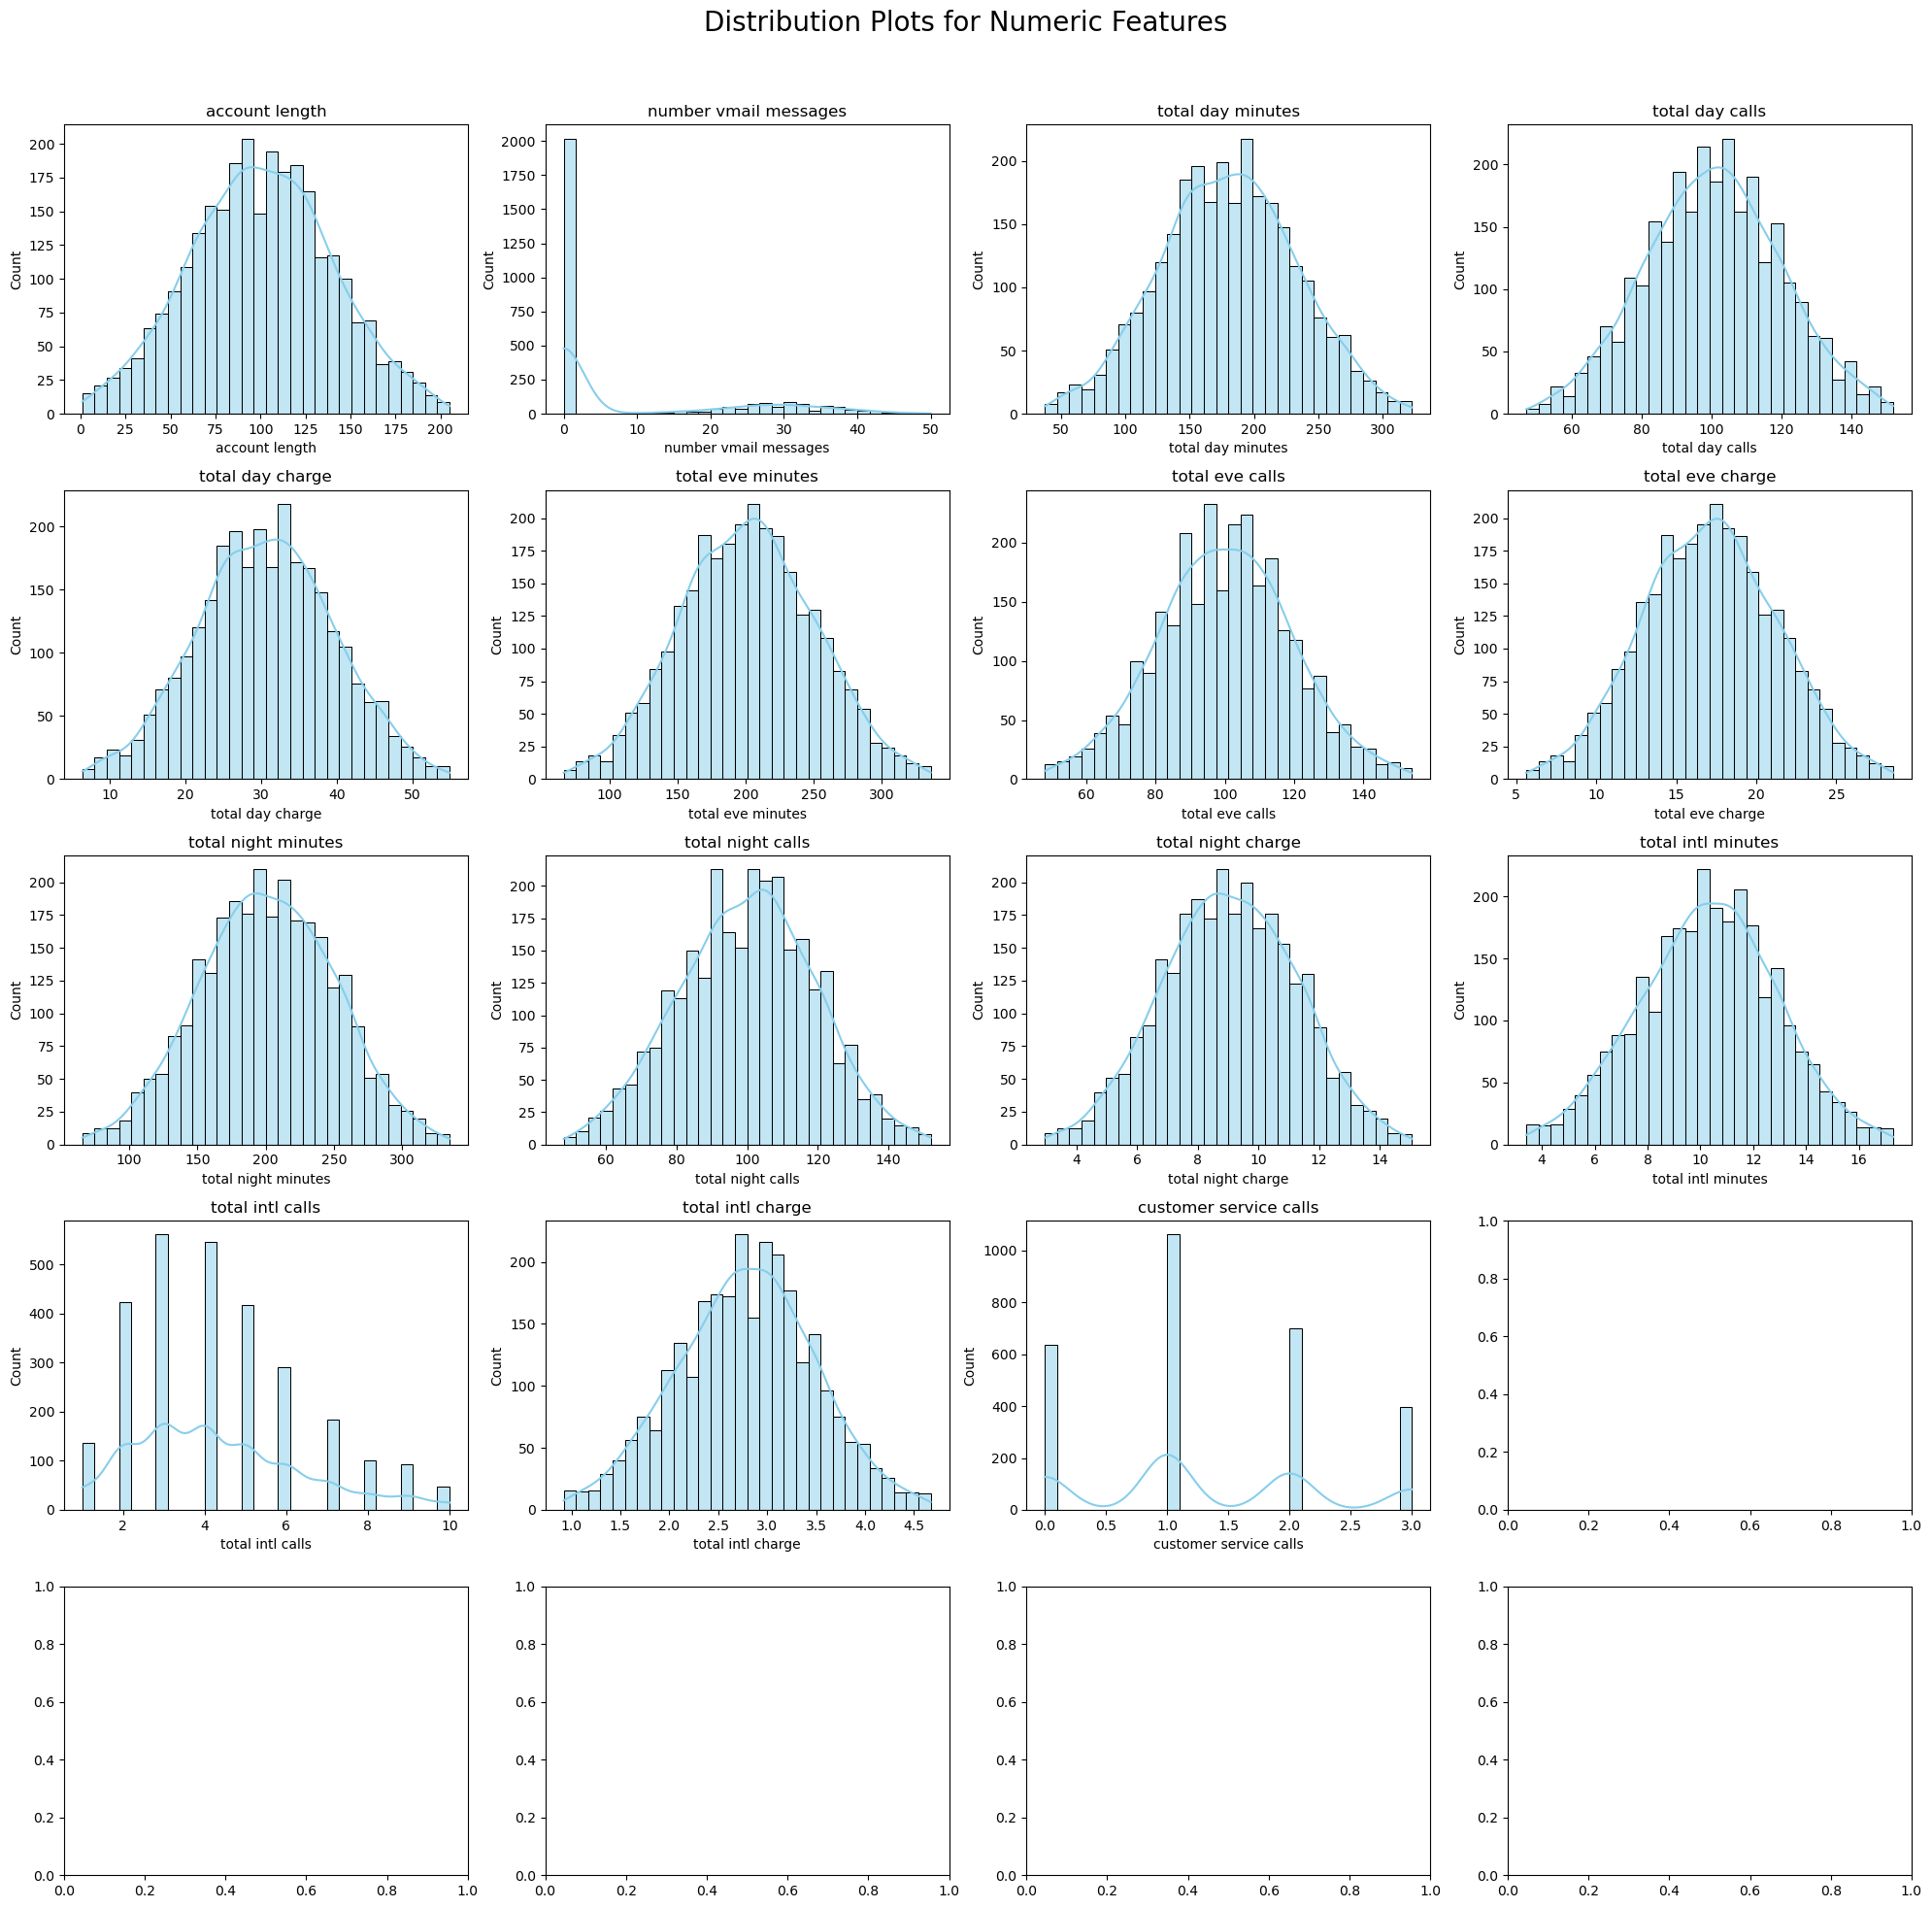

In [13]:
# List of numeric columns
numeric_columns = ['account length', 'number vmail messages',
                   'total day minutes', 'total day calls', 'total day charge',
                   'total eve minutes', 'total eve calls', 'total eve charge',
                   'total night minutes', 'total night calls', 'total night charge',
                   'total intl minutes', 'total intl calls', 'total intl charge',
                   'customer service calls']

# Setting up subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
fig.suptitle('Distribution Plots for Numeric Features', fontsize=20)

# Flattening the axes for easy iteration
axes = axes.flatten()

# Generating distribution plots for each numeric feature
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i], kde=True, color='skyblue', bins=30)
    axes[i].set_title(column)

# Adjusting layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Showing the plots
plt.show()

# Pairplots for Numeric Features (Hue as "Churn")

C:\Users\thorn\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


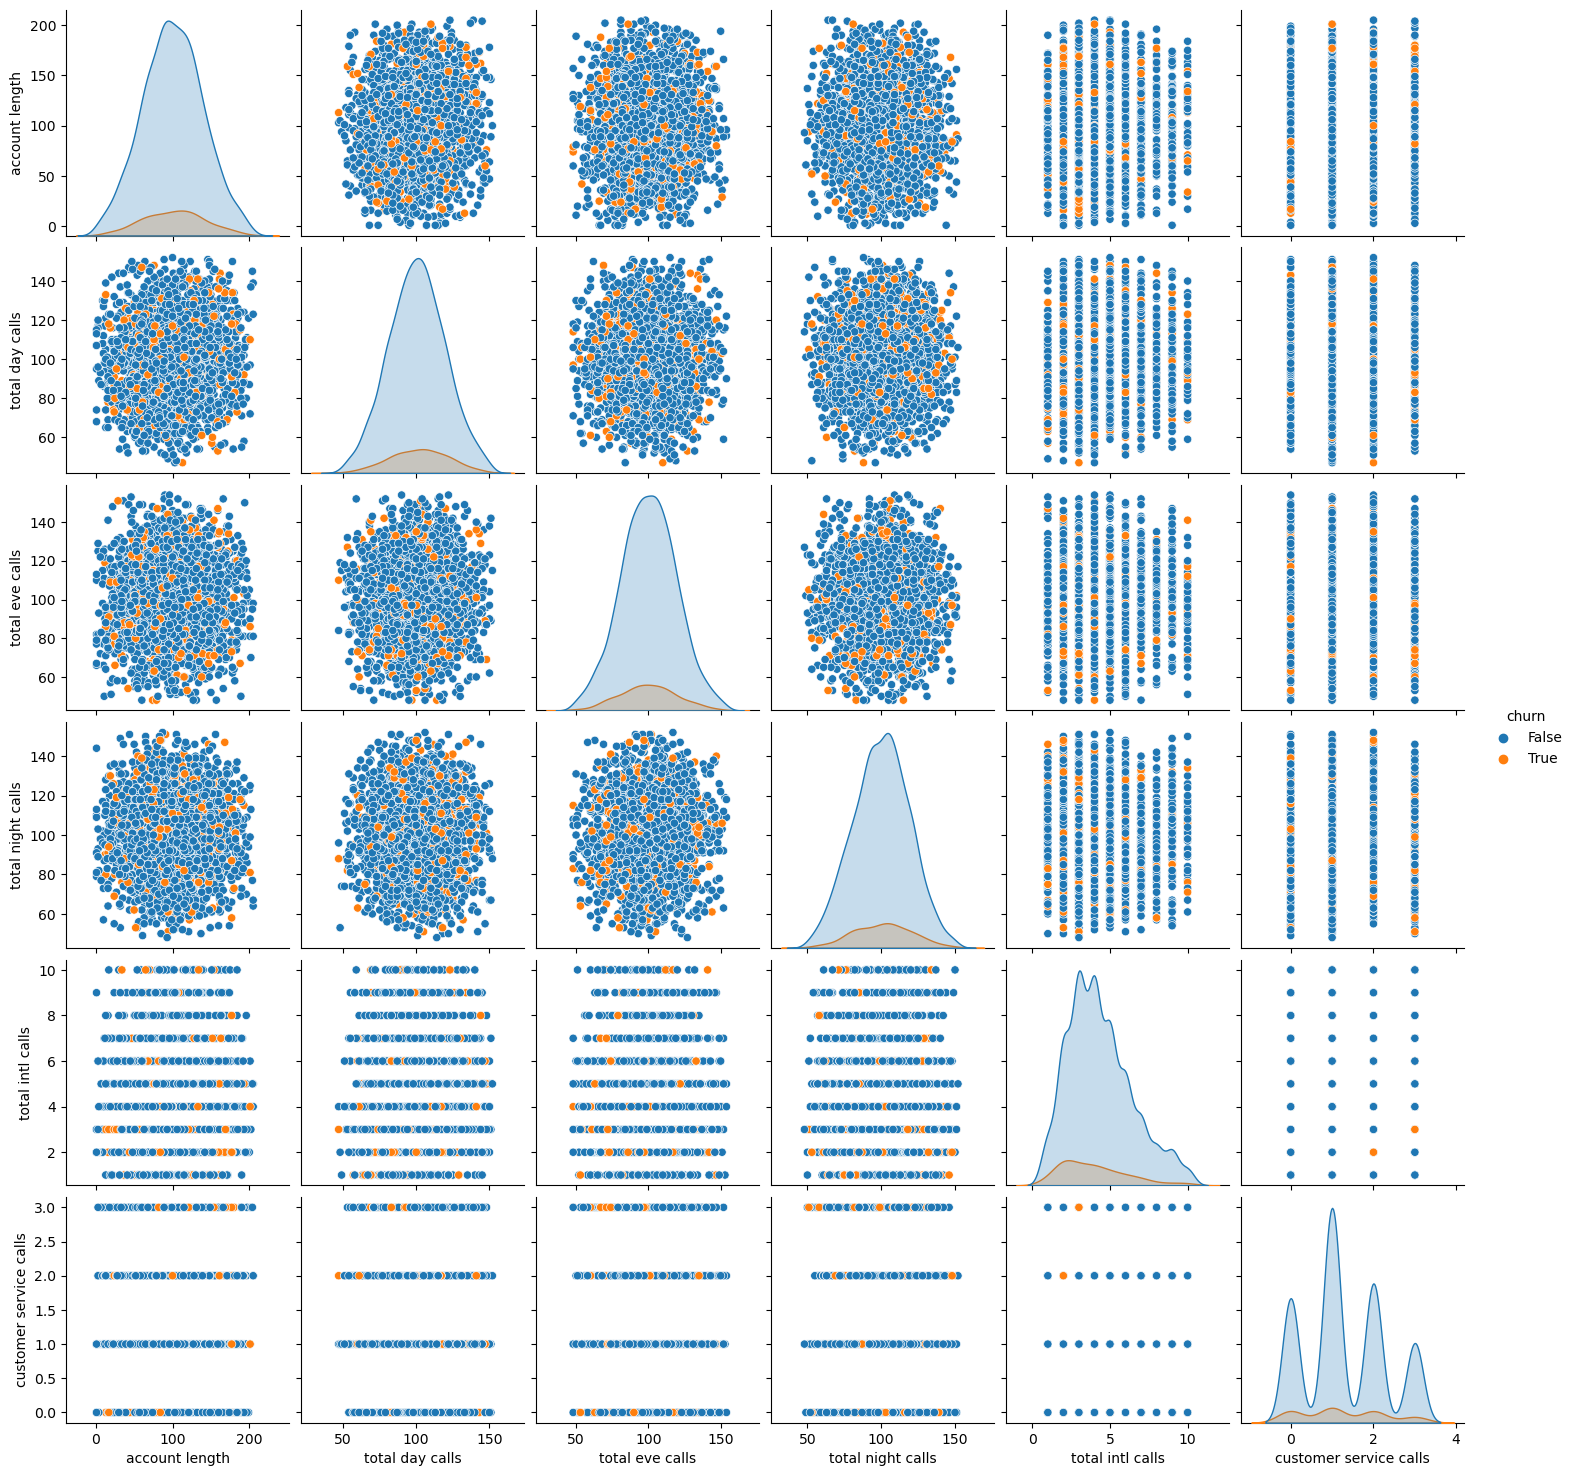

In [14]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

# Correlation Heatmap for Numeric Features

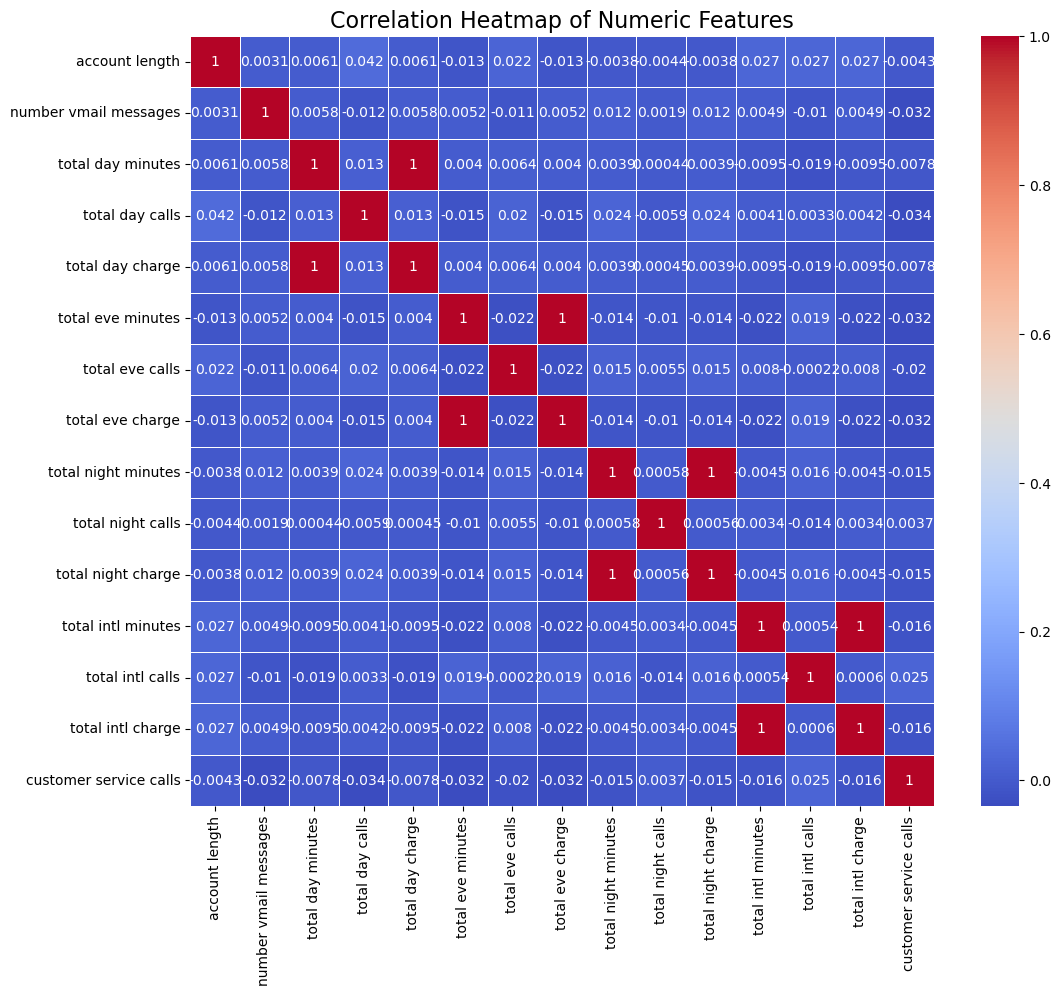

In [15]:
numeric_columns = ['account length', 'number vmail messages',
                   'total day minutes', 'total day calls', 'total day charge',
                   'total eve minutes', 'total eve calls', 'total eve charge',
                   'total night minutes', 'total night calls', 'total night charge',
                   'total intl minutes', 'total intl calls', 'total intl charge',
                   'customer service calls']

# Calculating the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()

# Categorical Features Analysis and plots of churn against them.

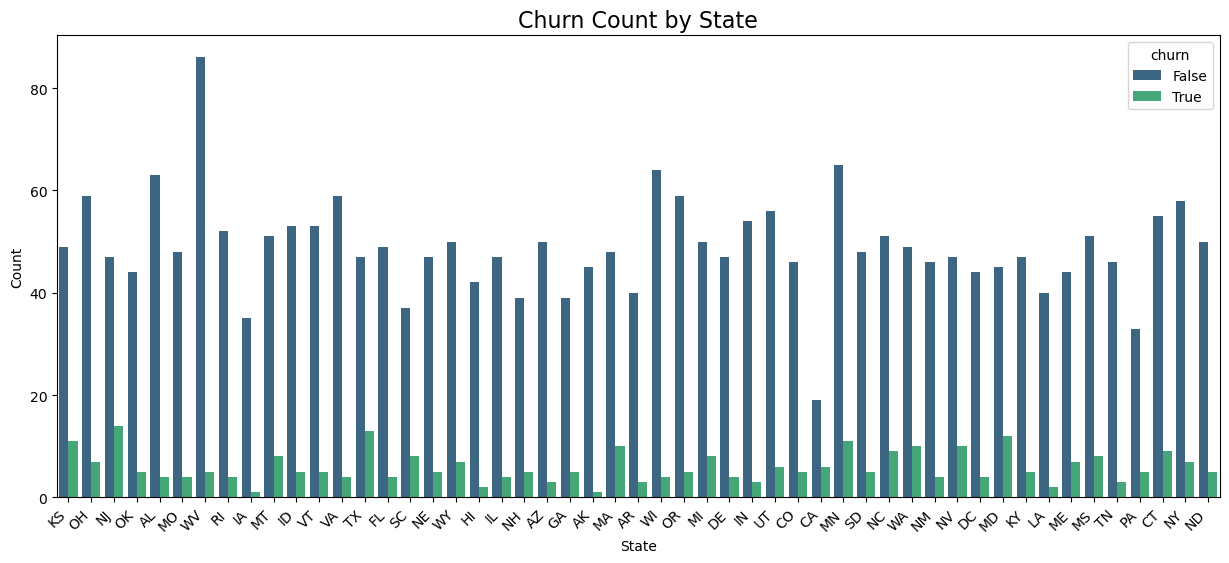

In [16]:
# Setting the size of the plot
plt.figure(figsize=(15, 6))

# Generating a count plot for churn count in the 'state' column
sns.countplot(x='state', hue='churn', data=df, palette='viridis')

# Rotating state labels for better visibility
plt.xticks(rotation=45, ha='right')

# Setting the title and labels
plt.title('Churn Count by State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Count')

# Showing the plot
plt.show()

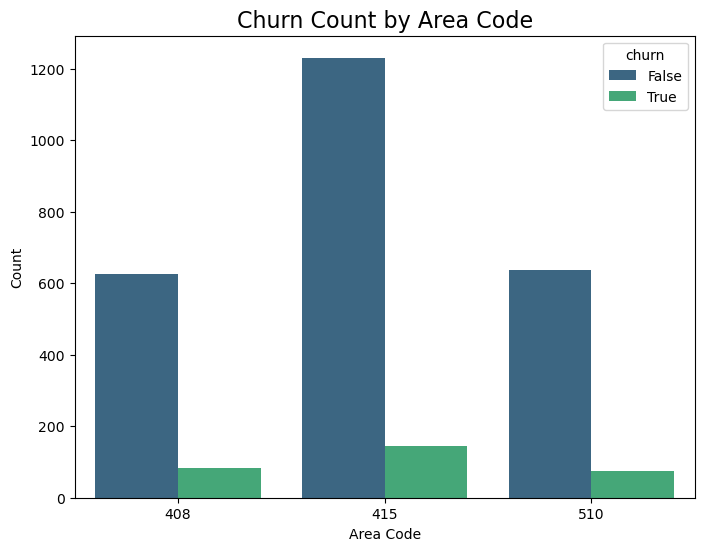

In [17]:
# Setting the size of the plot
plt.figure(figsize=(8, 6))

# Generating a count plot for churn count in the 'area code' column
sns.countplot(x='area code', hue='churn', data=df, palette='viridis')

# Setting the title and labels
plt.title('Churn Count by Area Code', fontsize=16)
plt.xlabel('Area Code')
plt.ylabel('Count')

# Showing the plot
plt.show()

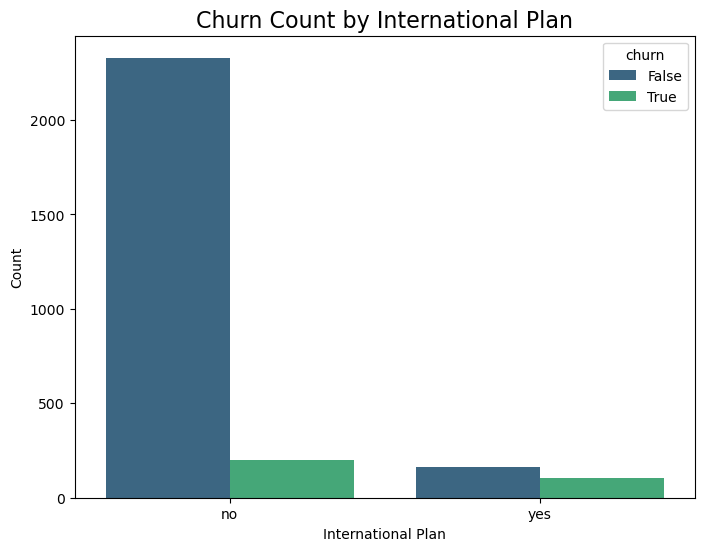

In [18]:
# Setting the size of the plot
plt.figure(figsize=(8, 6))

# Generating a count plot for churn count in the 'international plan' column
sns.countplot(x='international plan', hue='churn', data=df, palette='viridis')

# Setting the title and labels
plt.title('Churn Count by International Plan', fontsize=16)
plt.xlabel('International Plan')
plt.ylabel('Count')

# Showing the plot
plt.show()

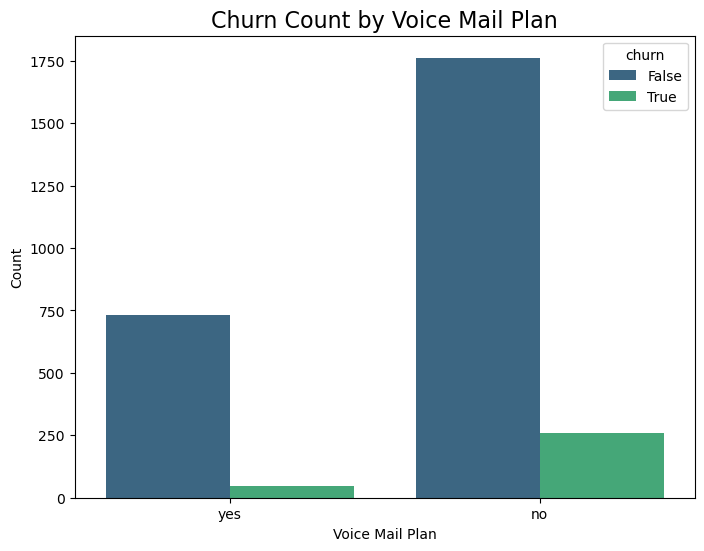

In [19]:
# Setting the size of the plot
plt.figure(figsize=(8, 6))

# Generating a count plot for churn count in the 'voice mail plan' column
sns.countplot(x='voice mail plan', hue='churn', data=df, palette='viridis')

# Setting the title and labels
plt.title('Churn Count by Voice Mail Plan', fontsize=16)
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')

# Showing the plot
plt.show()

# Dropping Highly-Correlated Features

In [20]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating a correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Setting the correlation threshold (you can adjust this threshold as needed)
correlation_threshold = 0.8

# Creating a set to store the columns to drop
columns_to_drop = set()

# Iterating through the correlation matrix to identify highly correlated variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

# Dropping the highly correlated variables from the DataFrame in-place
df.drop(columns=columns_to_drop, inplace=True)

# Displaying the modified DataFrame
print("DataFrame after dropping highly correlated variables:")
df.head(10)

DataFrame after dropping highly correlated variables:


state  account length  area code international plan voice mail plan  \
0     KS             128        415                 no             yes   
1     OH             107        415                 no             yes   
2     NJ             137        415                 no              no   
4     OK              75        415                yes              no   
5     AL             118        510                yes              no   
7     MO             147        415                yes              no   
9     WV             141        415                yes             yes   
11    RI              74        415                 no              no   
12    IA             168        408                 no              no   
13    MT              95        510                 no              no   

    number vmail messages  total day minutes  total day calls  \
0                      25              265.1              110   
1                      26              161.6              123   
2                       0              243.4              114   
4                       0              166.7              113   
5                       0              223.4               98   
7                       0              157.0               79   
9                      37              258.6               84   
11                      0              187.7              127   
12                      0              128.8               96   
13                      0              156.6               88   

    total eve minutes  total eve calls  total night minutes  \
0               197.4               99                244.7   
1               195.5              103                254.4   
2               121.2              110                162.6   
4               148.3              122                186.9   
5               220.6              101                203.9   
7               103.1               94                211.8   
9               222.0              111                326.4   
11              163.4              148                196.0   
12              104.9               71                141.1   
13              247.6               75                192.3   

    total night calls  total intl minutes  total intl calls  \
0                  91                10.0                 3   
1                 103                13.7                 3   
2                 104                12.2                 5   
4                 121                10.1                 3   
5                 118                 6.3                 6   
7                  96                 7.1                 6   
9                  97                11.2                 5   
11                 94                 9.1                 5   
12                128                11.2                 2   
13                115                12.3                 5   

    customer service calls  churn  
0                        1  False  
1                        1  False  
2                        0  False  
4                        3  False  
5                        0  False  
7                        0  False  
9                        0  False  
11                       0  False  
12                       1  False  
13                       3  False

In [21]:
print(df.churn.value_counts())

churn
False    2493
True      304
Name: count, dtype: int64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2797 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2797 non-null   object 
 1   account length          2797 non-null   int64  
 2   area code               2797 non-null   int64  
 3   international plan      2797 non-null   object 
 4   voice mail plan         2797 non-null   object 
 5   number vmail messages   2797 non-null   int64  
 6   total day minutes       2797 non-null   float64
 7   total day calls         2797 non-null   int64  
 8   total eve minutes       2797 non-null   float64
 9   total eve calls         2797 non-null   int64  
 10  total night minutes     2797 non-null   float64
 11  total night calls       2797 non-null   int64  
 12  total intl minutes      2797 non-null   float64
 13  total intl calls        2797 non-null   int64  
 14  customer service calls  2797 non-null   int64

# Transforming "Churn" Feature's Rows into 0s and 1s

In [23]:
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
df.head(10)

state  account length  area code international plan voice mail plan  \
0     KS             128        415                 no             yes   
1     OH             107        415                 no             yes   
2     NJ             137        415                 no              no   
4     OK              75        415                yes              no   
5     AL             118        510                yes              no   
7     MO             147        415                yes              no   
9     WV             141        415                yes             yes   
11    RI              74        415                 no              no   
12    IA             168        408                 no              no   
13    MT              95        510                 no              no   

    number vmail messages  total day minutes  total day calls  \
0                      25              265.1              110   
1                      26              161.6              123   
2                       0              243.4              114   
4                       0              166.7              113   
5                       0              223.4               98   
7                       0              157.0               79   
9                      37              258.6               84   
11                      0              187.7              127   
12                      0              128.8               96   
13                      0              156.6               88   

    total eve minutes  total eve calls  total night minutes  \
0               197.4               99                244.7   
1               195.5              103                254.4   
2               121.2              110                162.6   
4               148.3              122                186.9   
5               220.6              101                203.9   
7               103.1               94                211.8   
9               222.0              111                326.4   
11              163.4              148                196.0   
12              104.9               71                141.1   
13              247.6               75                192.3   

    total night calls  total intl minutes  total intl calls  \
0                  91                10.0                 3   
1                 103                13.7                 3   
2                 104                12.2                 5   
4                 121                10.1                 3   
5                 118                 6.3                 6   
7                  96                 7.1                 6   
9                  97                11.2                 5   
11                 94                 9.1                 5   
12                128                11.2                 2   
13                115                12.3                 5   

    customer service calls  churn  
0                        1      0  
1                        1      0  
2                        0      0  
4                        3      0  
5                        0      0  
7                        0      0  
9                        0      0  
11                       0      0  
12                       1      0  
13                       3      0

# One-Hot Encoding

In [24]:
categorical_columns = ['state', 'area code', 'international plan', 'voice mail plan']

# Using get_dummies to perform One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Displaying the DataFrame after One-Hot Encoding
print("DataFrame after One-Hot Encoding:")
df_encoded.head()

DataFrame after One-Hot Encoding:


account length  number vmail messages  total day minutes  total day calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
4              75                      0              166.7              113   
5             118                      0              223.4               98   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0              197.4               99                244.7                 91   
1              195.5              103                254.4                103   
2              121.2              110                162.6                104   
4              148.3              122                186.9                121   
5              220.6              101                203.9                118   

   total intl minutes  total intl calls  ...  state_VA  state_VT  state_WA  \
0                10.0                 3  ...     False     False     False   
1                13.7                 3  ...     False     False     False   
2                12.2                 5  ...     False     False     False   
4                10.1                 3  ...     False     False     False   
5                 6.3                 6  ...     False     False     False   

   state_WI  state_WV  state_WY  area code_415  area code_510  \
0     False     False     False           True          False   
1     False     False     False           True          False   
2     False     False     False           True          False   
4     False     False     False           True          False   
5     False     False     False          False           True   

   international plan_yes  voice mail plan_yes  
0                   False                 True  
1                   False                 True  
2                   False                False  
4                    True                False  
5                    True                False  

[5 rows x 66 columns]

In [25]:
# Performing One-Hot Encoding for 'state' and 'area code'
dummy_df_state = pd.get_dummies(df["state"], dtype=np.int64, prefix="state_is")
dummy_df_area_code = pd.get_dummies(df["area code"], dtype=np.int64, prefix="area_code_is")

# Performing One-Hot Encoding for 'international plan' and 'voice mail plan' with drop_first
dummy_df_international_plan = pd.get_dummies(df["international plan"], dtype=np.int64, prefix="international_plan_is", drop_first=True)
dummy_df_voice_mail_plan = pd.get_dummies(df["voice mail plan"], dtype=np.int64, prefix="voice_mail_plan_is", drop_first=True)

# Concatenating the dummy DataFrames with the original DataFrame
df = pd.concat([df, dummy_df_state, dummy_df_area_code, dummy_df_international_plan, dummy_df_voice_mail_plan], axis=1)

# Removing duplicated columns, if any
df = df.loc[:, ~df.columns.duplicated()]

# Dropping the original categorical columns
df = df.drop(['state', 'area code', 'international plan', 'voice mail plan'], axis=1)

# Displaying the modified DataFrame
df.head()


account length  number vmail messages  total day minutes  total day calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
4              75                      0              166.7              113   
5             118                      0              223.4               98   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0              197.4               99                244.7                 91   
1              195.5              103                254.4                103   
2              121.2              110                162.6                104   
4              148.3              122                186.9                121   
5              220.6              101                203.9                118   

   total intl minutes  total intl calls  ...  state_is_VT  state_is_WA  \
0                10.0                 3  ...            0            0   
1                13.7                 3  ...            0            0   
2                12.2                 5  ...            0            0   
4                10.1                 3  ...            0            0   
5                 6.3                 6  ...            0            0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0            0            0            0                 0                 1   
1            0            0            0                 0                 1   
2            0            0            0                 0                 1   
4            0            0            0                 0                 1   
5            0            0            0                 0                 0   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0                 0                          0                       1  
1                 0                          0                       1  
2                 0                          0                       0  
4                 0                          1                       0  
5                 1                          1                       0  

[5 rows x 68 columns]

# Scaling Numerical Features

In [26]:
transformer = MinMaxScaler()

# Defining a function to scale a column and reshape it appropriately
def scaling(column):
    return transformer.fit_transform(df[column].values.reshape(-1, 1))

# Applying scaling to each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    df[column] = scaling(column)

# Displaying the DataFrame after scaling
df.head()

account length  number vmail messages  total day minutes  total day calls  \
0        0.622549                   0.50           0.798455         0.600000   
1        0.519608                   0.52           0.435042         0.723810   
2        0.666667                   0.00           0.722261         0.638095   
4        0.362745                   0.00           0.452949         0.628571   
5        0.573529                   0.00           0.652037         0.485714   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0           0.486667         0.481132             0.665428           0.413462   
1           0.479630         0.518868             0.701487           0.528846   
2           0.204444         0.584906             0.360223           0.538462   
4           0.304815         0.698113             0.450558           0.701923   
5           0.572593         0.500000             0.513755           0.673077   

   total intl minutes  total intl calls  ...  state_is_VT  state_is_WA  \
0            0.474820          0.222222  ...          0.0          0.0   
1            0.741007          0.222222  ...          0.0          0.0   
2            0.633094          0.444444  ...          0.0          0.0   
4            0.482014          0.222222  ...          0.0          0.0   
5            0.208633          0.555556  ...          0.0          0.0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0          0.0          0.0          0.0               0.0               1.0   
1          0.0          0.0          0.0               0.0               1.0   
2          0.0          0.0          0.0               0.0               1.0   
4          0.0          0.0          0.0               0.0               1.0   
5          0.0          0.0          0.0               0.0               0.0   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0               0.0                        0.0                     1.0  
1               0.0                        0.0                     1.0  
2               0.0                        0.0                     0.0  
4               0.0                        1.0                     0.0  
5               1.0                        1.0                     0.0  

[5 rows x 68 columns]

# Train-Test Split

In [27]:
X = df.drop(['churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Resolving Unbalanced 'churn' Feature using SMOTE

In [28]:
# Initializing SMOTE with k_neighbors=5
sm = SMOTE(k_neighbors=5, random_state=123)

# Applying SMOTE to oversample the minority class
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Printing information about data shapes before and after oversampling
print('Before Oversampling, the shape of X_train: {}'.format(X_train.shape))
print('Before Oversampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After Oversampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After Oversampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before Oversampling, the shape of X_train: (2097, 67)
Before Oversampling, the shape of y_train: (2097,)
After Oversampling, the shape of X_train_over: (3730, 67)
After Oversampling, the shape of y_train_over: (3730,)


In [29]:
y_train_over.value_counts()

churn
0.0    1865
1.0    1865
Name: count, dtype: int64

In [30]:
churn = df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# drawing pie circule with plotly
figure = px.pie(y_train_over,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - Before SMOTE')
figure.show()

In [31]:
y_train_over_df = y_train_over.to_frame()
churn = y_train_over_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# drawing pie circule with plotly
figure = px.pie(y_train_over_df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - After SMOTE')
figure.show()

# MODELLING

# Logistic Regression Classifier

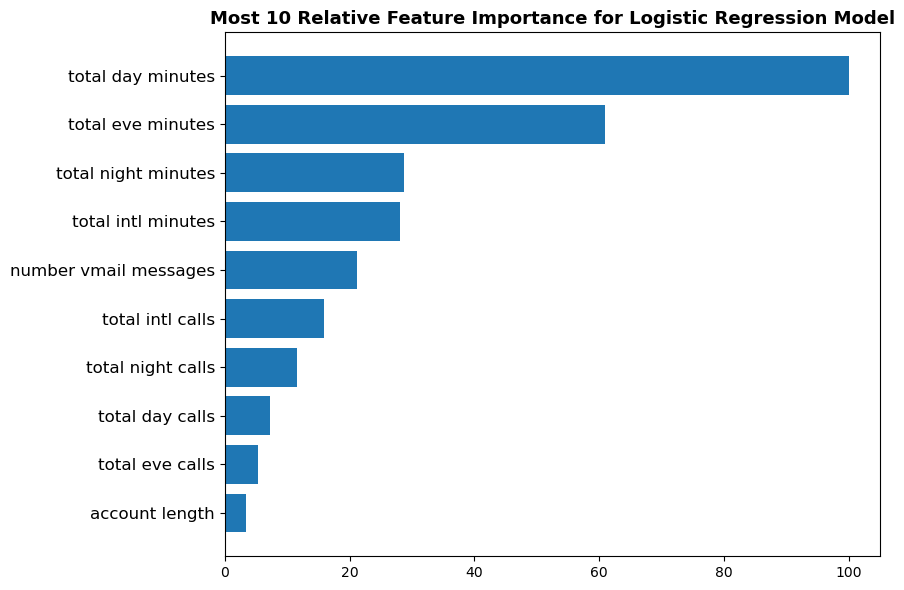

Accuracy: 0.8228571428571428

Confusion Matrix:
 [[528 100]
 [ 24  48]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       628
         1.0       0.32      0.67      0.44        72

    accuracy                           0.82       700
   macro avg       0.64      0.75      0.67       700
weighted avg       0.89      0.82      0.85       700



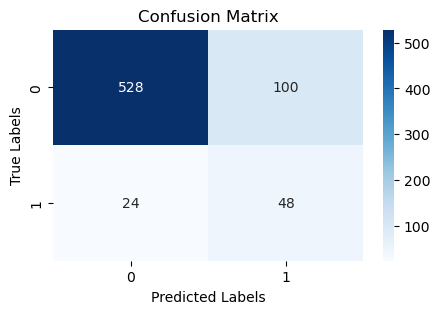

In [32]:
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over) 
y_pred_lr = lr.predict(X_test) 

# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()


# Initializing Logistic Regression model
logistic_model = LogisticRegression(random_state=123)

# Fitting the model on the oversampled training data
logistic_model.fit(X_train_over, y_train_over)

# Making predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Visualizing the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels'); ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

# Decision Tree Classifier

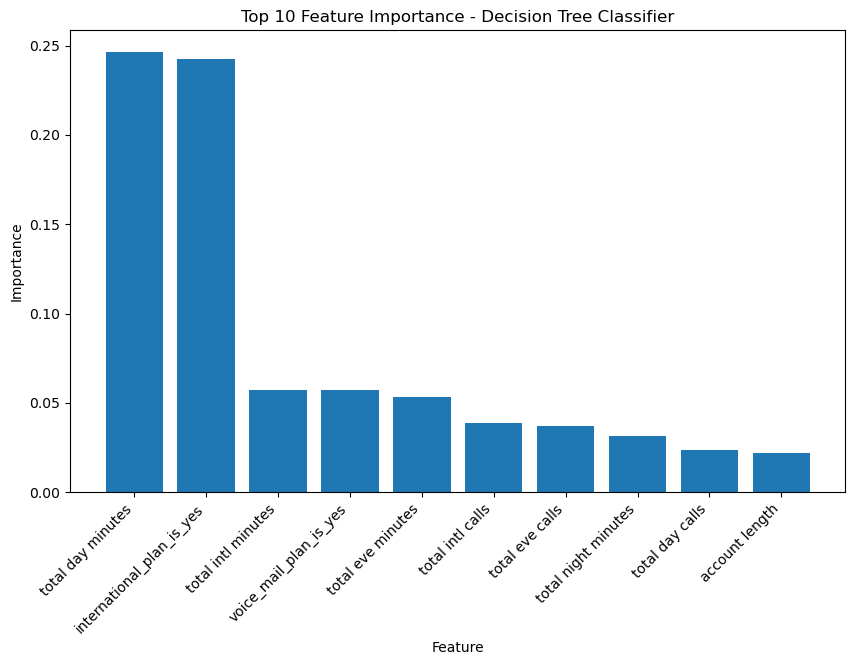

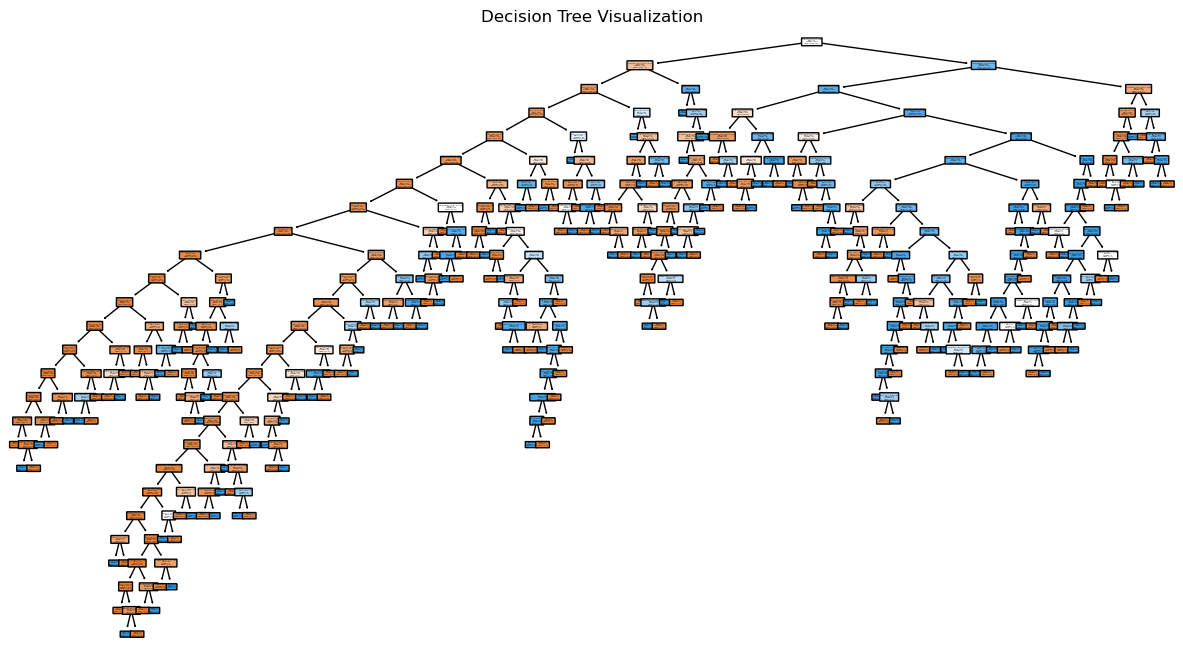

**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.90571
Decision Tree Classifier Metrics:
Accuracy: 0.90571
Precision: 0.53125
Recall: 0.70833
F1 Score: 0.60714

Confusion Matrix:
[[583  45]
 [ 21  51]]


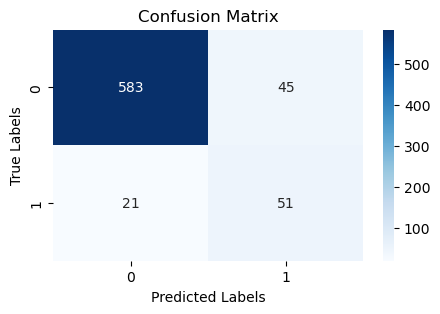

In [33]:
# Building a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=123)
dt_classifier.fit(X_train_over, y_train_over)

# Visualizing feature importance
feature_importance = dt_classifier.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

# Plotting the top 10 features by importance
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importance[sorted_idx][:10], align="center")
plt.xticks(range(10), X.columns[sorted_idx][:10], rotation=45, ha="right")
plt.title("Top 10 Feature Importance - Decision Tree Classifier")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Visualizing the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_classifier, feature_names=X.columns.tolist(), class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Making predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluating the Decision Tree Classifier
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ', round(accuracy_score(y_test, y_pred_dt), 5))

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, pos_label=1, average='binary')
recall = recall_score(y_test, y_pred_dt, pos_label=1, average='binary')
f1 = f1_score(y_test, y_pred_dt, pos_label=1, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Displaying the metrics
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels'); ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])
plt.show()


# Random Forest Classifier

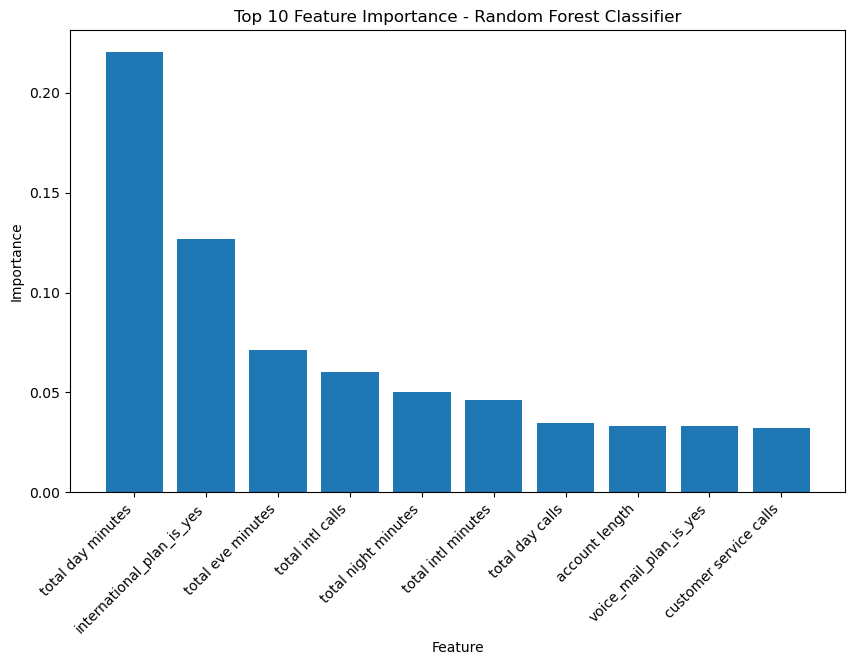

**************** RANDOM FOREST CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.94429
Random Forest Classifier Metrics:
Accuracy: 0.94429
Precision: 0.72603
Recall: 0.73611
F1 Score: 0.73103

Confusion Matrix:
[[608  20]
 [ 19  53]]


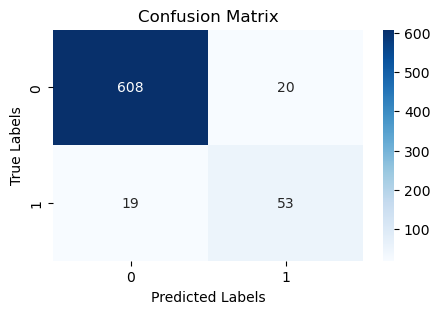

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Building a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=123)
rf_classifier.fit(X_train_over, y_train_over)

# Visualizing feature importance
feature_importance_rf = rf_classifier.feature_importances_
sorted_idx_rf = feature_importance_rf.argsort()[::-1]

# Plotting the top 10 features by importance
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importance_rf[sorted_idx_rf][:10], align="center")
plt.xticks(range(10), X.columns[sorted_idx_rf][:10], rotation=45, ha="right")
plt.title("Top 10 Feature Importance - Random Forest Classifier")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Making predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the Random Forest Classifier
print("**************** RANDOM FOREST CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ', round(accuracy_score(y_test, y_pred_rf), 5))

# Calculating evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1, average='binary')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Displaying the metrics
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.5f}")
print(f"Precision: {precision_rf:.5f}")
print(f"Recall: {recall_rf:.5f}")
print(f"F1 Score: {f1_rf:.5f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Visualizing the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax_rf = plt.subplots(1, 1, figsize=(5, 3))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', ax=ax_rf)
ax_rf.set_xlabel('Predicted Labels'); ax_rf.set_ylabel('True Labels'); ax_rf.set_title('Confusion Matrix')
ax_rf.xaxis.set_ticklabels(['0', '1']); ax_rf.yaxis.set_ticklabels(['0', '1'])
plt.show()


# Gradient Boosting Classifier

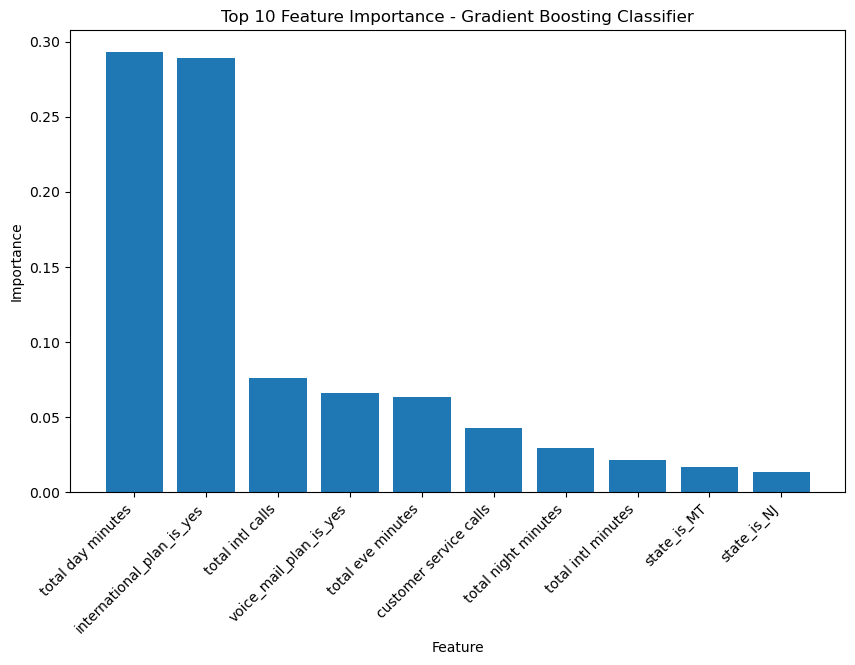

**************** GRADIENT BOOSTING CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.94143
Gradient Boosting Classifier Metrics:
Accuracy: 0.94143
Precision: 0.69620
Recall: 0.76389
F1 Score: 0.72848

Confusion Matrix:
[[604  24]
 [ 17  55]]


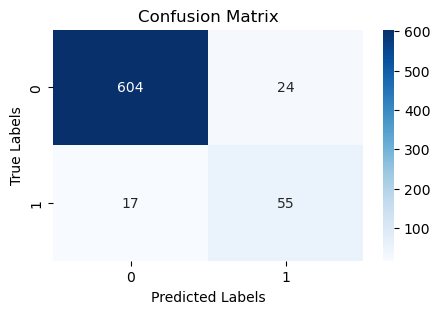

In [35]:
# Building a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=123)
gb_classifier.fit(X_train_over, y_train_over)

# Visualizing feature importance
feature_importance_gb = gb_classifier.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[::-1]

# Plotting the top 10 features by importance
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importance_gb[sorted_idx_gb][:10], align="center")
plt.xticks(range(10), X.columns[sorted_idx_gb][:10], rotation=45, ha="right")
plt.title("Top 10 Feature Importance - Gradient Boosting Classifier")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Making predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluating the Gradient Boosting Classifier
print("**************** GRADIENT BOOSTING CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ', round(accuracy_score(y_test, y_pred_gb), 5))

# Calculating evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, pos_label=1, average='binary')
recall_gb = recall_score(y_test, y_pred_gb, pos_label=1, average='binary')
f1_gb = f1_score(y_test, y_pred_gb, pos_label=1, average='binary')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Displaying the metrics
print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {accuracy_gb:.5f}")
print(f"Precision: {precision_gb:.5f}")
print(f"Recall: {recall_gb:.5f}")
print(f"F1 Score: {f1_gb:.5f}")
print("\nConfusion Matrix:")
print(conf_matrix_gb)

# Visualizing the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
f, ax_gb = plt.subplots(1, 1, figsize=(5, 3))
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='g', ax=ax_gb)
ax_gb.set_xlabel('Predicted Labels'); ax_gb.set_ylabel('True Labels'); ax_gb.set_title('Confusion Matrix')
ax_gb.xaxis.set_ticklabels(['0', '1']); ax_gb.yaxis.set_ticklabels(['0', '1'])
plt.show()

# Models Comparison

# ROC Curve

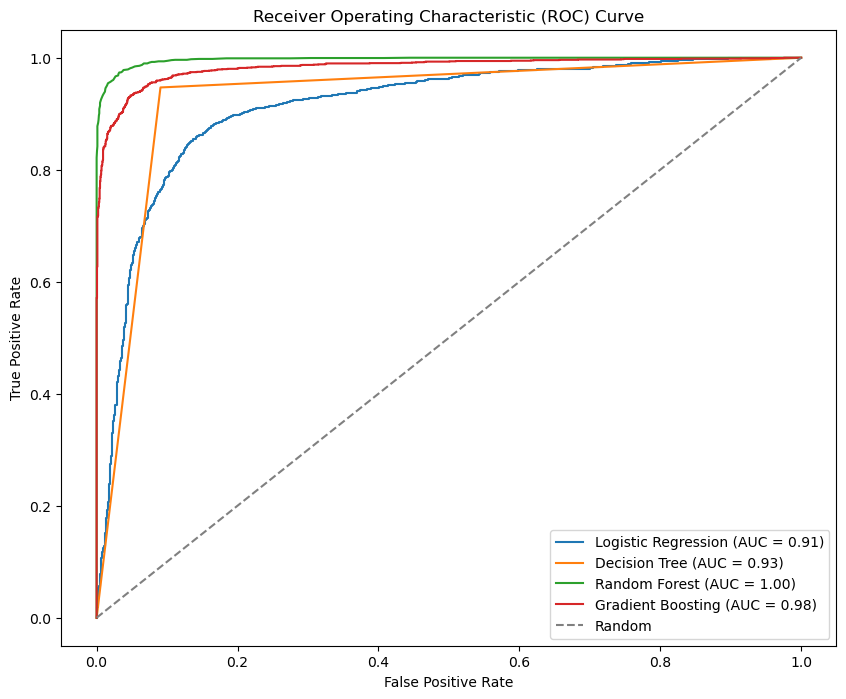

In [36]:
# Defining models
models = {
    'Logistic Regression': LogisticRegression(random_state=123),
    'Decision Tree': DecisionTreeClassifier(random_state=123),
    'Random Forest': RandomForestClassifier(random_state=123),
    'Gradient Boosting': GradientBoostingClassifier(random_state=123)
}

# Initializing the OneVsRestClassifier for multi-class classification
ovr_classifiers = {
    model_name: OneVsRestClassifier(model) for model_name, model in models.items()
}

# Training models and obtain predicted probabilities
y_probs = {}
for model_name, model in ovr_classifiers.items():
    y_score = cross_val_predict(model, X_train_over, y_train_over, cv=5, method='predict_proba')
    y_probs[model_name] = y_score[:, 1]  # Probability of the positive class

# Plotting ROC curves
plt.figure(figsize=(10, 8))

for model_name, y_score in y_probs.items():
    fpr, tpr, _ = roc_curve(y_train_over, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The best performing models will have a curve that hugs the upper left of the graph, which is the the random forest classifier in this case.

# Model Comparisons - F1 Score

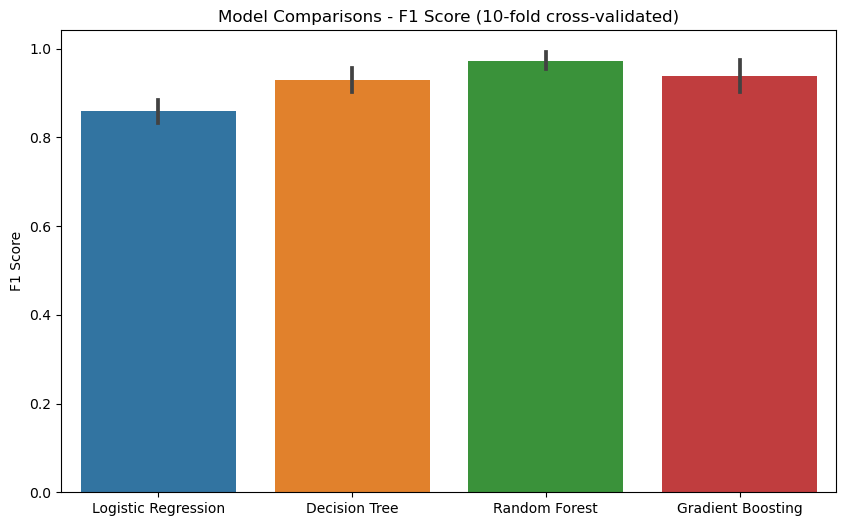

In [37]:
# Defining models
models = {
    'Logistic Regression': LogisticRegression(random_state=123),
    'Decision Tree': DecisionTreeClassifier(random_state=123),
    'Random Forest': RandomForestClassifier(random_state=123),
    'Gradient Boosting': GradientBoostingClassifier(random_state=123)
}

# Initializing a dictionary to store F1 scores
f1_scores = {}

# Evaluating F1 score for each model using 10-fold cross-validation
for model_name, model in models.items():
    f1_scorer = make_scorer(f1_score)
    scores = cross_val_score(model, X_train_over, y_train_over, cv=10, scoring=f1_scorer)
    f1_scores[model_name] = scores

# Plotting bar plots for model comparisons
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame.from_dict(f1_scores), errorbar='sd')
plt.title('Model Comparisons - F1 Score (10-fold cross-validated)')
plt.ylabel('F1 Score')
plt.show()

# Model Comparisons - Accuracy 

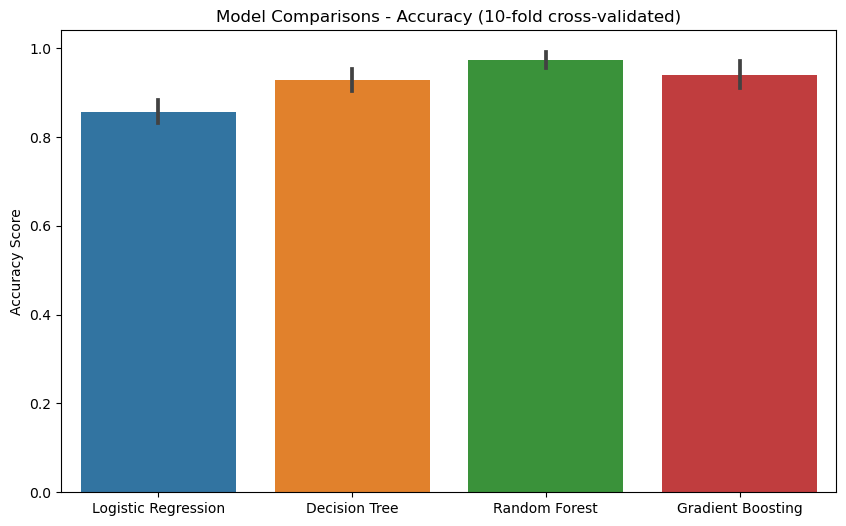

In [38]:
# Defining models
models = {
    'Logistic Regression': LogisticRegression(random_state=123),
    'Decision Tree': DecisionTreeClassifier(random_state=123),
    'Random Forest': RandomForestClassifier(random_state=123),
    'Gradient Boosting': GradientBoostingClassifier(random_state=123)
}

# Initializing a dictionary to store accuracy scores
accuracy_scores = {}

# Evaluating accuracy for each model using 10-fold cross-validation
for model_name, model in models.items():
    accuracy_scorer = make_scorer(accuracy_score)
    scores = cross_val_score(model, X_train_over, y_train_over, cv=10, scoring=accuracy_scorer)
    accuracy_scores[model_name] = scores

# Plotting bar plots for model comparisons
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame.from_dict(accuracy_scores), errorbar="sd")
plt.title('Model Comparisons - Accuracy (10-fold cross-validated)')
plt.ylabel('Accuracy Score')
plt.show()

# Hyperparameter Tuning of Random Forest Classifier

In [39]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=123)

# Defining the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a GridSearchCV object with the Random Forest model and the hyperparameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Training the Random Forest model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=123, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with the best hyperparameters:", accuracy)
print("Best hyperparameters:", best_params)

Accuracy with the best hyperparameters: 0.9328571428571428
Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


# Hyperparameter Tuning of Gradient Boosting Classifier

In [40]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Creating a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=123)

# Defining the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a GridSearchCV object with the Gradient Boosting model and the hyperparameter grid
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Training the Gradient Boosting model with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(random_state=123, **best_params)
best_gb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_gb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with the best hyperparameters:", accuracy)
print("Best hyperparameters:", best_params)

Accuracy with the best hyperparameters: 0.96
Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


# Modeling Insights

Both models show improved performance through hyperparameter tuning, with Gradient Boosting slightly outperforming Random Forest.

For the predictor and based on the results of the Hyperparameter tuning, we choose The Gradient Boosting Classifier Model for prediction.

# Conclusion

In conclusion, the Gradient Boosting Classifier, with tuned hyperparameters, is recommended for predicting customer churn in the telecom dataset. 
By acting on the insights gained from feature importance and model evaluations, the telecom company can implement targeted strategies to minimize churn and enhance customer satisfaction.

# Recommendations


Customer Segmentation for Revenue Maximization:
Identify high-value customers by analyzing their usage patterns, plan subscriptions, and service calls. Tailor strategies to retain these customers who significantly contribute to revenue.

Risk-Based Prioritization:
Segment customers based on churn risk to prioritize retention efforts. Target high-risk customers with personalized campaigns to reduce the likelihood of churn.

Optimizing Service Offerings:
Analyze peak vs. off-peak usage patterns to guide promotional offers or adjustments in service plans, enhancing overall customer satisfaction.

Customized Service Utilization:
Understand how different services (voice, international, voicemail) influence churn to tailor service offerings based on customer preferences and needs.

Feedback-Driven Improvement:
High numbers of customer service calls may indicate areas for service improvement. Analyze the reasons behind these calls to address specific pain points.

Holistic Customer Feedback:
Incorporate customer feedback through surveys or feedback mechanisms for qualitative insights that complement quantitative findings from the dataset.